# Modeling for Customer's Fraudulent Transaction Detection using PaySim Dataset

In this notebook, we will delve into the following key aspects of our modeling journey:

**1- Data Splitting:** We will divide our dataset into training and testing subsets, ensuring that our models are trained on one portion and evaluated on another. This helps us assess model generalization and performance accurately.

**2- Model Selection:** We will explore a variety of machine learning algorithms, each with its unique strengths and characteristics, to determine which ones are most suitable for our fraud detection task. This includes models like Random Forest, XGBoost, Logistic Regression, Naïve Bayes, and K-Nearest Neighbors (KNN).

**3- Class Imbalance Handling:** Given the inherent class imbalance in fraud detection tasks, we will investigate methods to address this issue, including the use of class weights and oversampling techniques like SMOTE.

**4 -Model Training:** We will train our selected models using the training dataset. This phase involves learning the underlying patterns and relationships within the data, allowing the models to make predictions based on input features.

**5- Model Evaluation:** Model performance is a critical aspect of our project. We will use a range of evaluation metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and precision-recall curves to assess how well our models identify fraudulent transactions while minimizing false positives.

By the end of this modeling phase, our aim is to have well-tuned models that can be deployed in real-world scenarios to automatically detect fraudulent transactions, ultimately safeguarding financial systems and providing value to both customers and financial institutions.


## Unbalanced dataset

When there is unequal representation of the classes in a classification issue, it is referred to as unbalanced data. Because of the PaySim dataset's extreme imbalance, either the class weights or the dataset must be adjusted in order for the model to produce reliable predictions (SMOTE).


**Oversampling the class of minorities:**

Compared to undersampling, oversampling is more computationally costly but results in no data loss. Here, 50% of the data are real transactions and 50% are fraudulent ones. By replication, random over-sampling adds extra minority observations at random. There is no loss of information, although the model may overfit.

SMOTE, on the other hand, produces "synthetic" observations of fresh minority class data points.


## Confusion Matrix

**True Positive - TP** [0] [ 0 ] - The number of authentic transactions that were accurately identified as authentic.

**False Positive - FP** [ 0 ] [ 1 ] - How many legitimate transactions were thought to be fraudulent. This demonstrates how many legitimate transactions were turned down by the model because it believed them to be fraudulent.

**False Negative - FN** [ 1 ] [ 0 ] - How many fraudulent transactions were assumed to be real. The most significant measure is this one! It suggests that fraud has happened but has gone undetected.

The number of fraud transactions that were accurately identified as fraudulent, or **True Negative - TN** [1 ] [1 ].

## Metrics

In conventional binary classification, parameters like accuracy and F1-score must be maximized while the loss function must be minimized.

Unfortunately, since there are 99% legitimate transactions and less than 1% fraudulent transactions in this fraud detection dataset, accuracy will not be possible. This suggests that there will be at least 99% accuracy. The accuracy conundrum therefore arises.

When it comes to fraud detection, the likelihood that a randomly selected fraud case would be projected to receive a higher score than a randomly selected legitimate instance is represented by the AUC of a classifier. Consequently, better classification performance is indicated by a larger AUC.

When dealing with highly imbalanced data as is the case with fraud detection, AUC (and ROC curves) may be too optimistic and the Area under the Precision-Recall Curve (AUPRC) gives a more informative picture of a classifier's performance.


The percentage of fraud that the algorithm has discovered, however, is the most crucial indicator. This measure focuses on the quantity of transactions that are falsely negative. False Negatives are important because they show that fraudulent transactions are mistaken for legitimate ones. Banks end up losing money as a result. False Positives (real transactions that are mistakenly believed to be fraudulent) are less important since the bank must get in touch with the client to confirm them, or the consumer must call the bank to confirm the "suspicious" transaction.

The metric is calculated the following way:

In [ ]:
# For data loading and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Import train test split
from sklearn.model_selection import train_test_split

# Import XGBoost
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

# For Model's Performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import GaussianNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# For Model's Performance
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, average_precision_score, plot_precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE

## Create a Function

In [ ]:
def Detail(y_test, results):
# generate confusion matrix for each model
    scores = confusion_matrix(y_test, results)
    True_Positive = scores[0][0]
    False_Positive = scores[0][1]
    False_Negative = scores[1][0]
    True_Negative = scores[1][1]
    Calculated_fraud = True_Negative / (False_Negative + True_Negative)
    print("True Positive = ", True_Positive, "\t\t\tFalse Positive = ", False_Positive, "\n")
    print("False Negative = ", False_Negative, "\t\t\tTrue Negative = ", True_Negative, "\n")
    print("% of Detected Fraud:\t", round(Calculated_fraud, 2), "(", Calculated_fraud, ")\n")
    print("% of Missed Fraud:\t", round((1 - Calculated_fraud), 2), "(", (1 - Calculated_fraud), ")\n")
    # Calculate and print the average precision-recall score
    precision_recall_score_avg = average_precision_score(y_test, results)
    print("Average Precision-Recall score:\t", precision_recall_score_avg)

Detail is a Python function that accepts the inputs y_test and results. This function appears to be used to evaluate the effectiveness of a classification model, most likely a fraud detection model, using the true labels that have been provided (y_test) and the expected labels or outcomes (results).

Here is a step-by-step explanation of what the code does:

confusion_matrix(y_test, results): By combining the anticipated labels (results) and the genuine labels (y_test), this function call creates a confusion matrix. A table known as a confusion matrix is frequently used to explain how well a classification model performs on a collection of data for which the true values are known. True Positive, False Positive, False Negative, and True Negative are the four values in the confusion matrix.

The values are then taken out of the confusion matrix by the code:

**True_Positive:** The number of cases that were both accurately predicted as positive and were in fact positive (in this case, probably fraudulent).

**False_Positive:** The number of events that were falsely predicted as positive even though they were actually negative (not fraudulent) and caused false alarms.

**False_Negative:** The proportion of cases that were falsely forecasted as negative (missed detections) despite being positive (fraudulent) in reality.

**True_Negative:** The proportion of cases that were both accurately foreseen as negative and were in fact negative (not fraudulent).

Calculated_fraud is a variable that shows the proportion of fraud cases that have been identified out of all the actual fraud cases. It is derived by dividing the total number of false negative and true negative cases by the number of true negative cases. This could be viewed as an indicator of how well the model can identify fraudulent cases.

printing the various percentages and values

The True Positive, False Positive, False Negative, and True Negative numbers are printed out by the code.
It displays the proportion of fraud cases that were caught as well as the percentage of fraud instances that were overlooked (1 - Calculated_fraud).

In [ ]:
def Plotting(algorithm, X_test, y_test):
    # Display confusion matrix results
    labels = ['Genral', 'Fraud']
    plot_confusion_matrix(algorithm, X_test, y_test, display_labels=labels, values_format='', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Plot the Precision-Recall curve
    disp = plot_precision_recall_curve(algorithm, X_test, y_test)
    disp.ax_.set_title("Precision-Recall Curve")
    plt.show()

Displaying the classification report: Using the classification_report function, the code creates and presents a classification report. Based on the true labels and anticipated labels, the classification report offers metrics like precision, recall, F1-score, and support for each class (fraudulent and non-fraudulent). The model's performance is covered in further detail in this report.

figuring out the average precision-recall score and printing it: The average_precision_score function is used in the code to calculate the average precision-recall score. In particular for unbalanced datasets like fraud detection, the average precision-recall score is a metric that quantifies the overall quality of the model's predictions.

In summary, this code aims to provide a detailed analysis of the performance of a classification model for fraud detection. It calculates and prints various metrics, including confusion matrix values, percentages of detected and missed fraud cases, a classification report, and the average precision-recall score.

In conclusion, the purpose of this code is to offer a thorough evaluation of a classification model's effectiveness in detecting fraud. The confusion matrix values, percentages of recognised and missed fraud cases, a classification report, and the average precision-recall score are just a few of the metrics it computes and outputs.



## Preparation of Data:

Loading X_new and y_new dataset and removing extra row of index

In [ ]:
# load dataset X as csv file
X=pd.read_csv('X.csv')
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Balance_Error_Orig,Balance_Error_Dest,DayHouur,WeekDay
0,1,0,181.00,181.00,0.0,-1.00,-1.00,0.00,1.810000e+02,1,1
1,1,1,181.00,181.00,0.0,21182.00,0.00,0.00,2.136300e+04,1,1
2,1,1,229133.94,15325.00,0.0,5083.00,51513.44,213808.94,1.827035e+05,1,1
3,1,0,215310.30,705.00,0.0,22425.00,0.00,214605.30,2.377353e+05,1,1
4,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,1,339682.13,339682.13,0.0,0.00,339682.13,0.00,0.000000e+00,23,1
2770405,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,0.00,6.311409e+06,23,1
2770406,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,0.00,1.000000e-02,23,1
2770407,743,0,850002.52,850002.52,0.0,-1.00,-1.00,0.00,8.500025e+05,23,1


In [ ]:
# load dataset y as csv file
y=pd.read_csv('y_new.csv')

# Remove unwanted index and display the dataset
y = y.drop(['Unnamed: 0'], axis = 1)
y

,isFraud
0,1
1,1
2,0
3,0
4,0
...,...
2770404,1
2770405,1
2770406,1
2770407,1


## Check Dimension of y Dataset:

In [ ]:
print('Dimensions:',y.ndim)

Dimensions: 2


## Convert y as One-Dimensional array:

In [ ]:
y_dim = np.ravel(y)
y_dim.ndim

1

Refer to Dissertation_Final.ipynb for the data visualisation and cleaning. isFraud tells whether the transaction is legitimate or fraudulent.

If isFraud = 0, the transaction is legitimate.

The transaction is fraudulent if isFraud = 1.



In [ ]:
# Calculate the total transactions, genuine transactions, and fraudulent transactions
plus, minus = np.bincount(y_dim)
final = minus + plus
genral_percentage = (plus * 100 / final)
fake_percentage = (minus * 100 / final)

# Print the results
print("Total transactions:\t\t", final)
print("Genral transactions:\t\t", plus, "(", round(genral_percentage, 2), "%)")
print("Fraudulent transactions:\t",minus, "(", round(fake_percentage, 2), "%)")

Total transactions:		 2770409
Genral transactions:		 2762196 ( 99.7 %)
Fraudulent transactions:	 8213 ( 0.3 %)


### SMOTE

## Random Forest

An ensemble learning-based supervised machine learning method is called Random Forests. This method creates a forest by combining different decision trees. Each tree initially contributes the same amount to the final product. The answer with the most votes is checked to determine the final outcome. Regression and classification problems may both be accomplished using Random Forests.

**Random Forests** have an O(t u n log(n)) time complexity, where:



trees(t) - the quantity of trees.

amount(u) - amount of characteristics taken into account while separating.



### Class weights

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_dim, test_size=0.3, random_state=5)

# Manually calculate class weights for a balanced dataset
class_weights = {0: 1.0, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}

# Display the weights for every class
print("Weight for a genuine transaction:", class_weights[0])
print("Weight for a fraud transaction:", class_weights[1])

# Create a Random Forest classifier with specified hyperparameters and class weights
forest = RandomForestClassifier(
    bootstrap=True,
    max_depth=100,
    max_features=2,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=200,
    random_state=10,
    verbose=1,
    class_weight=class_weights  # Set class_weight to the manually computed weights
)

# Train the model with the training data
forest.fit(X_train, y_train)

# Test the model's predictions with the test data
results = forest.predict(X_test)

Weight for a genuine transaction: 1.0
Weight for a fraud transaction: 341.32762577228596


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  4.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s


In [ ]:
Detail(y_test, results)

True Positive =  828575 			False Positive =  0 

False Negative =  6 			True Negative =  2542 

% of Detected Fraud:	 1.0 ( 0.9976452119309263 )

% of Missed Fraud:	 0.0 ( 0.0023547880690737433 )

Average Precision-Recall score:	 0.9976524310789946


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s


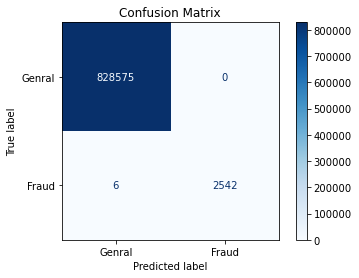

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s


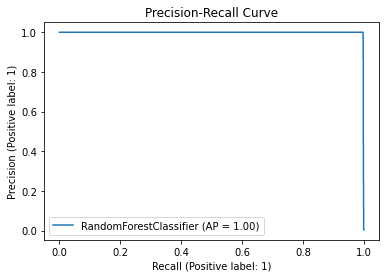

In [ ]:
Plotting(forest, X_test, y_test)

## SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
# Apply SMOTE to x and y_dim
Sample_Random = SMOTE()
Random_X, Random_y = Sample_Random.fit_resample(X, y_dim)

# Print the result after SMOTE
print("Data without SMOTE:", Counter(y_dim))
print("Data with SMOTE:", Counter(Random_y))

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(Random_X, Random_y, test_size=0.2, random_state=52)

# Create a Random forest Classifier with specific parameter
model_Random = RandomForestClassifier(
    bootstrap=True, max_depth=100, max_features=2,
    min_samples_leaf=3, min_samples_split=10, n_estimators=200,
    random_state=10, verbose=1
)

# Train Random Forest model on X_train and y_test
model_Random.fit(X_train, y_train)

# Test Random Forest on X_test
results = model_Random.predict(X_test)

Data without SMOTE: Counter({0: 2762196, 1: 8213})
Data with SMOTE: Counter({1: 2762196, 0: 2762196})


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 14.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   13.1s


In [ ]:
Detail(y_test, results)

True Positive =  552196 			False Positive =  12 

False Negative =  41 			True Negative =  552630 

% of Detected Fraud:	 1.0 ( 0.999925814815686 )

% of Missed Fraud:	 0.0 ( 7.418518431401289e-05 )

Average Precision-Recall score:	 0.9999412106861043


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   13.2s


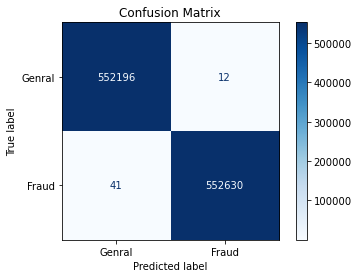

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   13.4s


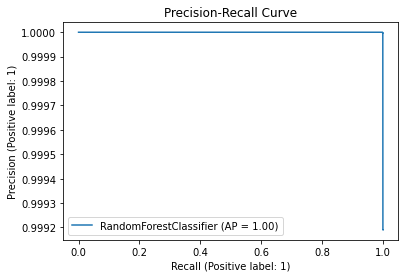

In [ ]:
Plotting(model_Random, X_test, y_test)

## XGBoost - Extreme Gradient Boosting

Supervised learning makes use of boosting. With the help of this ensemble technique, the model's accuracy is increased by combining weak learners into a strong learner. A class can be distinguished using rules. The prediction is invalid if a class is determined based on a single learner. Before selecting the class of the final product, several rules are used.


**Gradient Boosting** generates base learners in a progressive manner so that the most recent base learner is more effective than the previous one. The loss function uses the preceding learner's optimised data. Extreme Gradient Boosting operates quickly and effectively. Regression and classification issues are addressed by it. For other models, XGBoost is utilised as a starting point to provide precise predictions. Using this algorithm, you can:

**Parallelization**: The algorithm makes use of all available processing power.

**Optimising the cache** allows calculations to be stored there and retrieved quickly to complete calculations.

**Computing outside of memory** - XGBoost can handle data that takes up more space than is physically possible.

**Regularisation** - keeps the model from becoming overfit

**Missing  values** - Takes care of missing values in a dataset


The time complexity of **XGBoost is O(t d x log(n))**, where;

x - The number of non-missing items in the training data.

t - number of trees,

d - height of trees.

A fresh sample requires **O(t d)** time.


## Class weights

In this illustration, XGBoost sets the scale_pos_weight hyperparameter with the desired **weight** in order to take the weights into account when doing calculations.


In [ ]:
# Split the data for  70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_dim, test_size=0.3, random_state=52)

In [ ]:
parameter = (y_dim == 0).sum() / (1.0 * (y_dim == 1).sum())

model_XGB = XGBClassifier(n_estimators = 100, learning_rate = 0.01, subsample = 0.3, max_depth = 5, colsample_bytree = 0.5, min_child_weight = 3, scale_pos_weight = parameter)

# Train model
model_XGB.fit(X_train, y_train)

# Test model
results = model_XGB.predict(X_test)

In [ ]:
Detail(y_test, results)

True Positive =  828700 			False Positive =  10 

False Negative =  12 			True Negative =  2401 

% of Detected Fraud:	 1.0 ( 0.9950269374222959 )

% of Missed Fraud:	 0.0 ( 0.004973062577704135 )

Average Precision-Recall score:	 0.9909143457000903


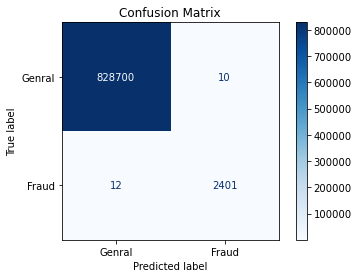

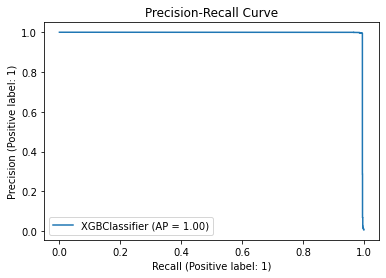

In [ ]:
Plotting(model_XGB, X_test, y_test)

## SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
# Split the data into 70% training and 30%
X_train, X_test, y_train, y_test = train_test_split(Random_X, Random_y, test_size = 0.3, random_state = 5)

xgb_smote = XGBClassifier(n_estimators = 100, learning_rate = 0.01, subsample = 0.3, max_depth = 5, colsample_bytree = 0.5, min_child_weight = 3)

# Train model with train data
xgb_smote.fit(X_train, y_train)

# Test model's predictions with test data
results = xgb_smote.predict(X_test)

In [ ]:
Detail(y_test, results)

True Positive =  828743 			False Positive =  20 

False Negative =  3978 			True Negative =  824577 

% of Detected Fraud:	 1.0 ( 0.9951988703224288 )

% of Missed Fraud:	 0.0 ( 0.004801129677571181 )

Average Precision-Recall score:	 0.997574996056599


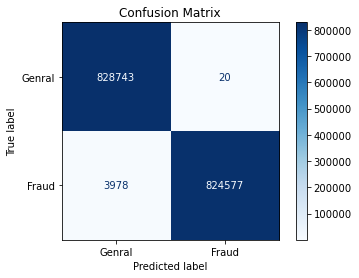

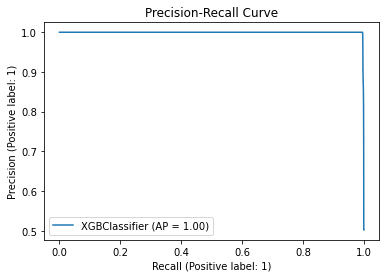

In [ ]:
Plotting(xgb_smote, X_test, y_test)

## Logistic Regression

In contrast to linear regression, which predicts continuous data, logistic regression classifies binary dependent variables. With logistic regression, a logistic function with a S shape is fitted to the data as opposed to a line.


Where: The time complexity is O(n d)

Number- The quantity of training examples.
Dimensions- stands for the number of data dimensions.




## class weights

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dim, test_size=0.3, random_state=52)

# Create a logistic regression model with balanced class weights
logistic_weights = LogisticRegression(C=3, penalty='l1', solver='liblinear', class_weight='balanced')

# Fit the model on the training data
logistic_weights.fit(X_train, y_train)

# Make predictions on the test data
results = logistic_weights.predict(X_test)

In [ ]:
Detail(y_test, results)

True Positive =  783550 			False Positive =  45160 

False Negative =  215 			True Negative =  2198 

% of Detected Fraud:	 0.91 ( 0.9108992954828015 )

% of Missed Fraud:	 0.09 ( 0.08910070451719854 )

Average Precision-Recall score:	 0.04253573862172018


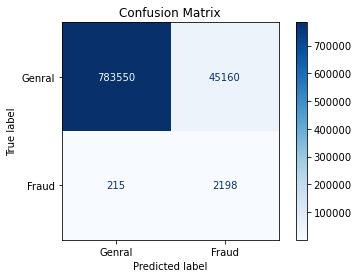

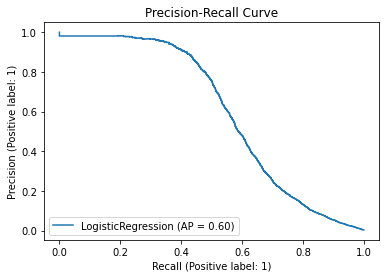

In [ ]:
Plotting(logistic_weights, X_test, y_test)

## SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
sampling= SMOTE()
sample_x, sample_y = sampling.fit_resample(X, y_dim)

print("Data without SMOTE:", Counter(y_dim))
print("Data with SMOTE:", Counter(sample_y))

Data without SMOTE: Counter({0: 2762196, 1: 8213})
Data with SMOTE: Counter({1: 2762196, 0: 2762196})


In [ ]:
# Split the oversampled data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(sample_x, sample_y, test_size=0.3, random_state=42)

In [ ]:
# Create a logistic regression model
logistic = LogisticRegression(C=3, penalty='l1', solver='liblinear')

# Fit the logistic regression model on the training data
logistic.fit(X_train, y_train)

# Make predictions on the test data
results = logistic.predict(X_test)


In [ ]:
Detail(y_test, results)

True Positive =  785440 			False Positive =  42658 

False Negative =  62253 			True Negative =  766967 

% of Detected Fraud:	 0.92 ( 0.9249258339162104 )

% of Missed Fraud:	 0.08 ( 0.07507416608378958 )

Average Precision-Recall score:	 0.9137552910556304


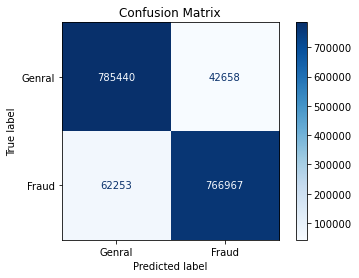

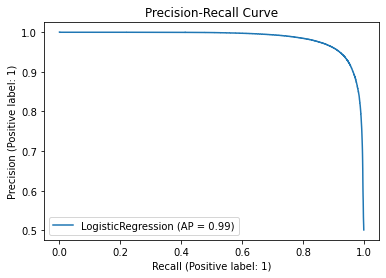

In [ ]:
Plotting(logistic, X_test, y_test)

## Naive Bayes Classifier

The naive Bayes approach relies on the Bayes' Theorem's definition of conditional probability. Based on past knowledge of circumstances that might be connected to the event, it determines the conditional probability of the occurrence of the event.

A variation of Naive Bayes that handles continuous data and follows to the Gaussian normal distribution is the Gaussian Naive Bayes. Gaussian Naive Bayes is one of the Naive Bayes types that is used to detect fraud.


O(n d) is the time complexity where:


the quantity (n) of training instances

d - number of data dimensions



## Normal

In [ ]:
# train test split with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_dim, test_size=0.3, random_state=5)

# Gaussian Naive Bayes classifier  initializing.
gaussian_naive_bayes = GaussianNB()

# train the model
gaussian_naive_bayes.fit(X_train, y_train)

# predicting on the test data
results = gaussian_naive_bayes.predict(X_test)

In [ ]:
Detail(y_test, results)

True Positive =  820137 			False Positive =  8438 

False Negative =  1531 			True Negative =  1017 

% of Detected Fraud:	 0.4 ( 0.39913657770800626 )

% of Missed Fraud:	 0.6 ( 0.6008634222919937 )

Average Precision-Recall score:	 0.04477406897669674


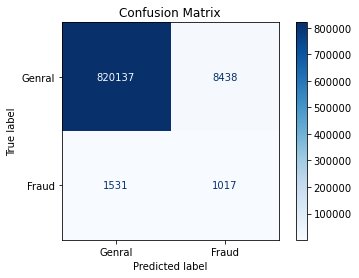

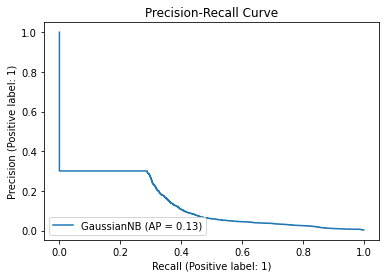

In [ ]:
Plotting(gaussian_naive_bayes, X_test, y_test)

## SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
# Split the data into 70% training and 30% testing, make sure data split is consistent (random_state)
X_train, X_test, y_train, y_test = train_test_split(Random_X, Random_y, test_size = 0.3, random_state = 5)
gnb_smote = GaussianNB()
gnb_smote.fit(X_train, y_train)
results = gnb_smote.predict(X_test)

In [ ]:
Detail(y_test, results)

True Positive =  813785 			False Positive =  14978 

False Negative =  444490 			True Negative =  384065 

% of Detected Fraud:	 0.46 ( 0.4635359149362444 )

% of Missed Fraud:	 0.54 ( 0.5364640850637556 )

Average Precision-Recall score:	 0.7143355644866245


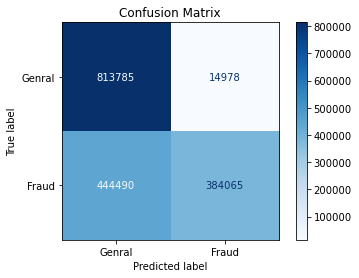

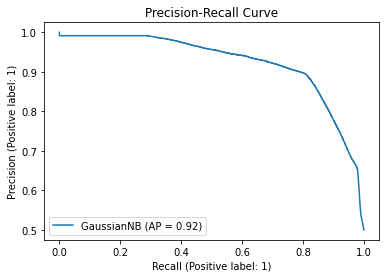

In [ ]:
Plotting(gnb_smote, X_test, y_test)

## K-Nearest Neighbour

A straightforward supervised machine learning approach called K-Nearest Neighbours is utilised to resolve classification and regression issues. This approach locates a fresh set of unlabeled data's k nearest neighbours. The number of closest neighbours that will be taken into account while classifying the data is K. Choosing an odd K number is a good practise since it ensures that one class receives one more vote than the other when determining the class of the unlabeled data.


This approach requires very little math knowledge and is very simple to use. The drawbacks are that it uses a lot of memory, that fresh predictions take longer, and that there isn't any actual pre-processing. The computation of the label will take longer the larger the K value is. Where: The time complexity is O(k n d);

k is the number of neighbours.

n is the number of practise examples.

d - number of data dimensions.


## Normal

In [ ]:
scaling= StandardScaler()

In [ ]:
scaling_X = scaling.fit_transform(X)

In [ ]:
# Split the data into 70% training and 30% testing, make sure data split is consistent (random_state)
X_train, X_test, y_train, y_test = train_test_split(scaling_X, y_dim, test_size = 0.3, random_state = 5)

In [ ]:
knn_classifier_scaled = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
knn_classifier_scaled.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
results= knn_classifier_scaled.predict(X_test)

In [ ]:
Detail(y_test, results)

True Positive =  828523 			False Positive =  52 

False Negative =  830 			True Negative =  1718 

% of Detected Fraud:	 0.67 ( 0.67425431711146 )

% of Missed Fraud:	 0.33 ( 0.32574568288854 )

Average Precision-Recall score:	 0.6554443645209155


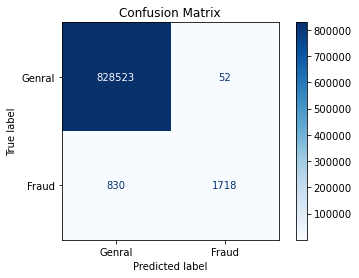

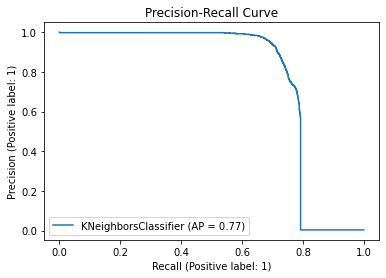

In [ ]:
Plotting(knn_classifier_scaled, X_test, y_test)

## SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
scaled_X = scaling.fit_transform(Random_X)
print("Normal: ", Counter(y_dim))
print("SMOTE: ", Counter(Random_y))

Normal:  Counter({0: 2762196, 1: 8213})
SMOTE:  Counter({1: 2762196, 0: 2762196})


In [ ]:
# Split the data into 70% training and 30% testing, make sure data split is consistent (random_state)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Random_y, test_size = 0.3, random_state = 52)

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
knn_smote.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
results= knn_smote.predict(X_test)

In [ ]:
Detail(y_test, results)

True Positive =  825959 			False Positive =  2591 

False Negative =  1117 			True Negative =  827651 

% of Detected Fraud:	 1.0 ( 0.9986522163017877 )

% of Missed Fraud:	 0.0 ( 0.0013477836982123126 )

Average Precision-Recall score:	 0.9962096260915597


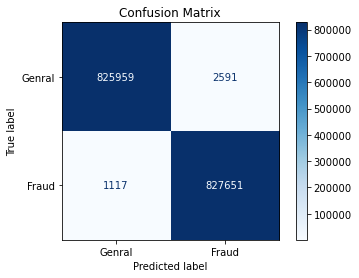

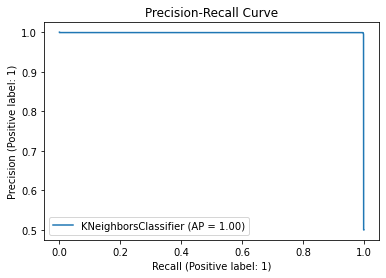

In [ ]:
Plotting(knn_smote, X_test, y_test)

## Conclusion

Using the PaySim dataset, we investigated several machine learning models for fraud detection in this investigation. We tested many algorithms, such as Naive Bayes, Logistic Regression, Random Forest, XGBoost, and k-Nearest Neighbours (KNN).

We found that models like Random Forest and XGBoost performed very well in properly identifying fraudulent transactions when paired with methods like Synthetic Minority Over-sampling Technique (SMOTE) and suitable class weights. These models successfully recognised a significant portion of fraudulent actions because to their high True Positive rates.

The performance of the model was also considerably enhanced by the application of SMOTE in managing unbalanced data, which decreased the number of missed fraud instances. These models consistently have high Average Precision-Recall scores, which confirms their efficacy by summarising the precision-recall trade-off.

It's crucial to remember that the ideal model might be determined by particular company needs, available computing power, and the precision vs. recall trade-off. Each model has advantages and disadvantages, and these things should be taken into account while choosing a model.

In summary, this research offers a thorough review of fraud detection strategies and illustrates how cutting-edge machine learning models handle unbalanced datasets. These models provide effective ways to spot fraudulent transactions, including top performers Random Forest and XGBoost with SMOTE.

